# INSTALLATION

In [43]:
!pip install spacy spacy-layout
!python -m spacy download en_core_web_sm 

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.6 MB/s eta 0:00:08
     -- ------------------------------------- 0.8/12.8 MB 1.7 MB/s eta 0:00:08
     ---- ----------------------------------- 1.3/12.8 MB 1.8 MB/s eta 0:00:07
     ---- ----------------------------------- 1.6/12.8 MB 1.9 MB/s eta 0:00:07
     ------ --------------------------------- 2.1/12.8 MB 2.0 MB/s eta 0:00:06
     --------- ------------------------------ 2.9/12.8 MB 2.1 MB/s eta 0:00:05
     ---------- ----------------------------- 3.4/12.8 MB 2.2 MB/s eta 0:00:05
     ------------- -------------------------- 4.2/12.8 MB 2.4 MB/s eta 0:00:04
     -------------- ------------------------- 4.7/12.8 MB 2.4 MB/s eta 0:00:04
     ---------------- ----------------------- 5.2/12.8 MB 2.5 MB/s eta 0:00:04
     ------------------ --------------------- 6.0/12.8 MB 2.5 MB/s

# IMPORTING

In [44]:
import spacy
from spacy_layout import spaCyLayout

In [45]:
nlp = spacy.load("en_core_web_sm")

layout = spaCyLayout(nlp)

doc = layout("./phieu_dien_tim_original.pdf")

In [46]:
print(doc)

Sở Y tế: ..............................

BV: ....................................

PHIẾU ĐIỆN TIM

(lần thứ .................)

MS: 23/BV-01

Số vào viện .....................

- Họ tên người bệnh: ..............................................................                         Tuổi: .........................   Nam/Nữ

- Cân nặng: .................... kg;                                                                           Chiều cao:  ............................cm

- Địa chỉ: .....................................................................................................  ....................................................

- Khoa: ....................................................................................... Buồng: .....................................Giường:  .......

- Chẩn đoán:  .................................................................................................................................................

- Yêu cầu kiểm tra: ...........

In [47]:
print(doc._.markdown)

Sở Y tế: ..............................

BV: ....................................

## PHIẾU ĐIỆN TIM

(lần thứ .................)

MS: 23/BV-01

Số vào viện .....................

- Họ tên người bệnh: ..............................................................                         Tuổi: .........................   Nam/Nữ

- Cân nặng: .................... kg;                                                                           Chiều cao:  ............................cm

- Địa chỉ: .....................................................................................................  ....................................................

- Khoa: ....................................................................................... Buồng: .....................................Giường:  .......

- Chẩn đoán:  .................................................................................................................................................

- Yêu cầu kiểm tra: ........

In [48]:
print(doc._.tables)

[]


In [49]:
print(doc._.layout)

DocLayout(pages=[PageLayout(page_no=1, width=595.4400024414062, height=841.6799926757812), PageLayout(page_no=2, width=595.4400024414062, height=841.6799926757812), PageLayout(page_no=3, width=595.4400024414062, height=841.6799926757812), PageLayout(page_no=4, width=595.4400024414062, height=841.6799926757812)])


In [50]:
print(doc._.layout.pages)

[PageLayout(page_no=1, width=595.4400024414062, height=841.6799926757812), PageLayout(page_no=2, width=595.4400024414062, height=841.6799926757812), PageLayout(page_no=3, width=595.4400024414062, height=841.6799926757812), PageLayout(page_no=4, width=595.4400024414062, height=841.6799926757812)]


In [51]:
doc._.pages[0]

(PageLayout(page_no=1, width=595.4400024414062, height=841.6799926757812),
 [Sở Y tế: ..............................,
  BV: ....................................,
  PHIẾU ĐIỆN TIM,
  (lần thứ .................),
  MS: 23/BV-01,
  Số vào viện .....................,
  - Họ tên người bệnh: ..............................................................                         Tuổi: .........................   Nam/Nữ,
  - Cân nặng: .................... kg;                                                                           Chiều cao:  ............................cm,
  - Địa chỉ: .....................................................................................................  ....................................................,
  - Khoa: ....................................................................................... Buồng: .....................................Giường:  .......,
  - Chẩn đoán:  .................................................................................

In [52]:
for section in doc._.pages[0][1]: # doc is the document object 
    print("label", section.label_)
    print("text", section.text)
    print("layout", section._.layout)
    print("--------------------------------")

label text
text Sở Y tế: ..............................
layout SpanLayout(x=43.224, y=45.94399999999996, width=135.76600000000002, height=10.331999999999994, page_no=1)
--------------------------------
label text
text BV: ....................................
layout SpanLayout(x=43.224, y=63.22399999999993, width=130.93200000000002, height=10.331999999999994, page_no=1)
--------------------------------
label section_header
text PHIẾU ĐIỆN TIM
layout SpanLayout(x=239.14, y=47.21399999999994, width=134.62, height=13.524999999999977, page_no=1)
--------------------------------
label text
text (lần thứ .................)
layout SpanLayout(x=248.26, y=69.31999999999994, width=112.28899999999999, height=12.002000000000066, page_no=1)
--------------------------------
label text
text MS: 23/BV-01
layout SpanLayout(x=439.61, y=45.94399999999996, width=74.80999999999995, height=10.331999999999994, page_no=1)
--------------------------------
label text
text Số vào viện .....................
layout

In [53]:
!pip install matplotlib

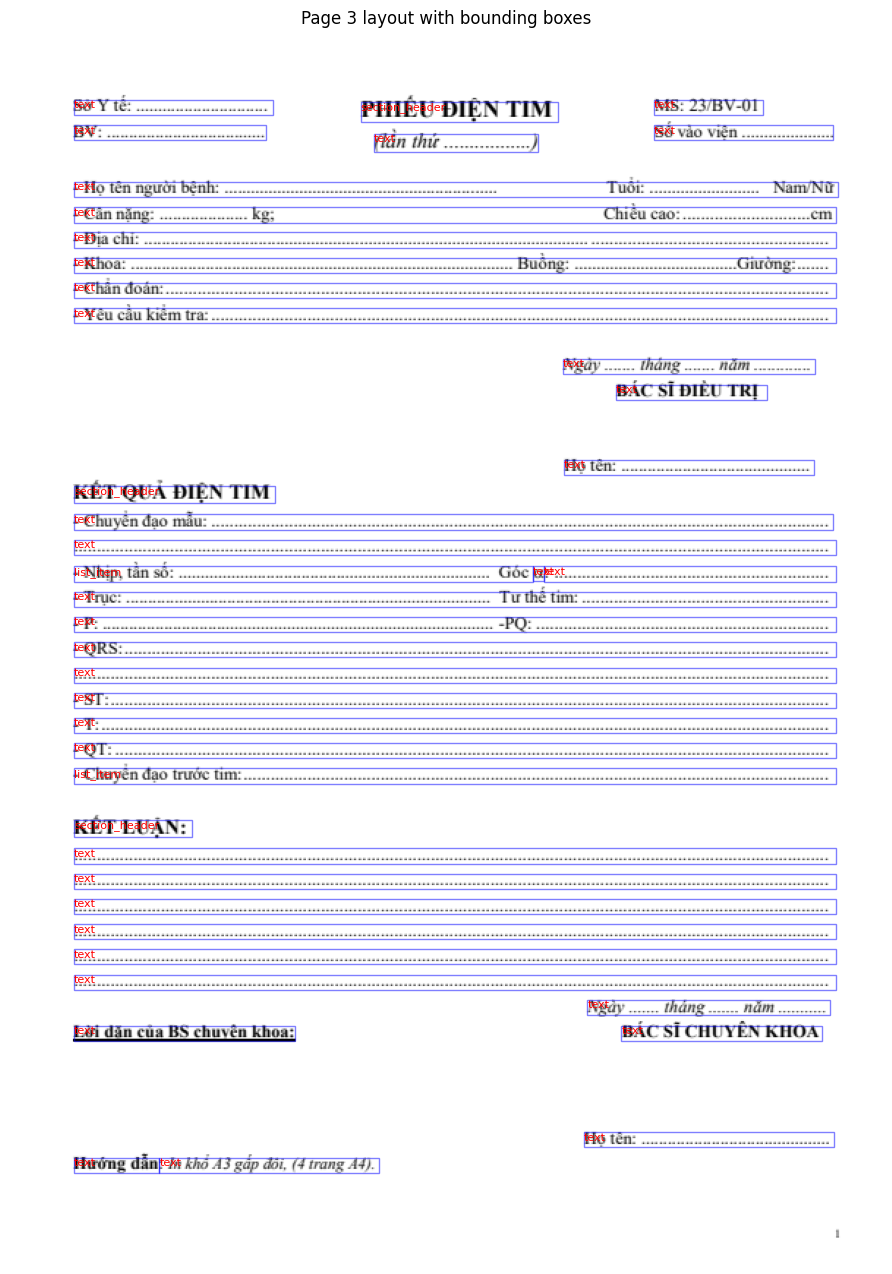

In [54]:
import pypdfium2 as pdfium
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

pdf2img = pdfium.PdfDocument("./phieu_dien_tim_original.pdf")

img = pdf2img

page_image = img[0].render(scale=1) # Render the first page of the PDF
numpy_arr = page_image.to_numpy()

page = doc._.pages[0]
page_layout = doc._.layout.pages[0]

fig, ax = plt.subplots(figsize=(12, 16))

ax.imshow(numpy_arr)

for section in page[1]:
    layout = section._.layout

    rect = Rectangle(
        (layout.x, layout.y),
        layout.width,
        layout.height,
        fill=False,
        color="blue",
        linewidth=1,
        alpha=0.5,
    )
    ax.add_patch(rect)

    ax.text(
        layout.x,
        layout.y,
        section.label_,
        fontsize=8,
        color="red",
        verticalalignment="top",
    )

ax.set_title("Page 3 layout with bounding boxes")
ax.axis("off")

plt.show()

In [55]:
doc2 = nlp(doc)
for ent in doc2.ents:
    print(ent.text.strip(), ent.label_)

ĐIỆN TIM PERSON
23 CARDINAL
Nam/Nữ

- Cân WORK_OF_ART
kg PERSON
cm

- Địa PERSON
Buồng PERSON
Giường PERSON
kiểm PERSON
Ngày PERSON
KẾT ORG
Nhịp GPE
thế tim: ...................................................... PERSON
tim PERSON
KẾT PERSON
Ngày PERSON
BS ORG
Hướng PERSON
A3 PERSON
4 CARDINAL
VL GPE
thực quản MCL 1 PERSON
2 CARDINAL
3 CARDINAL


# Pharse 2
### Generate fields

In [59]:
# Định nghĩa các trường cần trích xuất từ phiếu điện tim
fields_mapping = {
    'co_quan_chu_quan': 'Sở Y tế',  # Cơ quan chủ quản
    'benh_vien': 'BV',  # Bệnh viện
    'ho_ten': 'Họ tên người bệnh',  # Họ tên bệnh nhân
    'tuoi': 'Tuổi',  # Tuổi
    'gioi_tinh': 'Nam/Nữ',  # Giới tính
    'can_nang': 'Cân nặng',  # Cân nặng
    'chieu_cao': 'Chiều cao',  # Chiều cao
    'dia_chi': 'Địa chỉ',  # Địa chỉ
    'khoa': 'Khoa',  # Khoa
    'buong': 'Buồng',  # Buồng
    'giuong': 'Giường',  # Giường
    'chan_doan': 'Chẩn đoán',  # Chẩn đoán
    'yeu_cau_kiem_tra': 'Yêu cầu kiểm tra',  # Yêu cầu kiểm tra
    'ngay_lap': 'Ngày',  # Ngày lập phiếu
    'bac_si_dieu_tri': 'BÁC SĨ ĐIỀU TRỊ',  # Bác sĩ điều trị
    'ket_qua_dien_tim': 'KẾT QUẢ ĐIỆN TIM',  # Kết quả điện tim
    'chuyen_dao_mau': 'Chuyển đạo mẫu',  # Chuyển đạo mẫu
    'nhip_tan_so': 'Nhịp, tần số',  # Nhịp, tần số
    'goc_alpha': 'Góc α',  # Góc alpha
    'truc': 'Trục',  # Trục
    'tu_the_tim': 'Tư thế tim'  # Tư thế tim
}

def extract_field_value(text, key):
    """Trích xuất giá trị từ text dựa trên key"""
    lines = text.split('\n')  # Tách text thành các dòng
    for line in lines:
        if key in line:  # Kiểm tra nếu key có trong dòng
            # Tách phần sau dấu ':'
            if ':' in line:
                value = line.split(':', 1)[1].strip()  # Lấy phần sau dấu ':'
                # Loại bỏ các dấu chấm và khoảng trắng thừa
                value = value.replace('.' * 20, '').replace('.' * 10, '').strip()
                return value if value else None  # Trả về giá trị hoặc None
    return None  # Trả về None nếu không tìm thấy

# Trích xuất các trường từ document
extracted_fields = {}  # Dictionary để lưu các trường đã trích xuất

# Lấy toàn bộ text từ document
full_text = doc.text  # Lấy toàn bộ text từ PDF

# Trích xuất từng trường
for field_name, search_key in fields_mapping.items():
    value = extract_field_value(full_text, search_key)  # Trích xuất giá trị
    extracted_fields[field_name] = value  # Lưu vào dictionary

# Hiển thị kết quả
print("=== CÁC TRƯỜNG ĐÃ TRÍCH XUẤT ===")
for field_name, value in extracted_fields.items():
    print(f"{field_name}: {value}")  # In ra từng trường và giá trị

=== CÁC TRƯỜNG ĐÃ TRÍCH XUẤT ===
co_quan_chu_quan: None
benh_vien: ......
ho_ten: ..                         Tuổi: .....   Nam/Nữ
tuoi: ..                         Tuổi: .....   Nam/Nữ
gioi_tinh: ..                         Tuổi: .....   Nam/Nữ
can_nang: kg;                                                                           Chiều cao:  ........cm
chieu_cao: kg;                                                                           Chiều cao:  ........cm
dia_chi: .  ..
khoa: ....... Buồng: .......Giường:  .......
buong: ....... Buồng: .......Giường:  .......
giuong: ....... Buồng: .......Giường:  .......
chan_doan: .....
yeu_cau_kiem_tra: .....
ngay_lap: None
bac_si_dieu_tri: None
ket_qua_dien_tim: None
chuyen_dao_mau: .....
nhip_tan_so: .  Góc
goc_alpha: None
truc: ...  Tư thế tim: ....
tu_the_tim: ...  Tư thế tim: ....


# Pharse 3
### Generate fields into json format